# Importación e instalación de dependencias

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
!sudo apt-get install texlive-latex-extra texlive-fonts-recommended dvipng cm-super

Reading package lists... Done
Building dependency tree       
Reading state information... Done
texlive-fonts-recommended is already the newest version (2019.20200218-1).
texlive-fonts-recommended set to manually installed.
The following additional packages will be installed:
  cm-super-minimal fonts-lato ghostscript javascript-common libapache-pom-java
  libcommons-logging-java libcommons-parent-java libfontbox-java libjs-jquery
  libpdfbox-java libruby2.7 pfb2t1c2pfb preview-latex-style rake ruby
  ruby-minitest ruby-net-telnet ruby-power-assert ruby-test-unit ruby-xmlrpc
  ruby2.7 rubygems-integration texlive-pictures texlive-plain-generic
Suggested packages:
  ghostscript-x apache2 | lighttpd | httpd libavalon-framework-java
  libcommons-logging-java-doc libexcalibur-logkit-java liblog4j1.2-java ri
  ruby-dev bundler python3-pygments icc-profiles libfile-which-perl
  libspreadsheet-parseexcel-perl texlive-latex-extra-doc dot2tex prerex
  ruby-tcltk | libtcltk-ruby texlive-pictures-

# 10. 

  ##   $a)$
  

In [ ]:
def exp(x,flips,n):
  """Ejecuta el experimento de las monedas una vez"""
  exp=np.zeros((flips,n))
  
  for i in range(flips):
    #Lanzamiento de las monedas
    exp[i]=np.random.randint(low=0,high=2,size=n)

  all=np.mean(exp,axis=0) #Fracción de caras

  v1=all[1]
  vrand=np.random.choice(all)
  vmin=np.min(all)

  return v1,vrand,vmin

In [ ]:
n=1000
flips=10
N=100000

#Se ejecuta el experimento muchas veces
data1=np.vectorize(exp)(np.zeros(N),flips,n)

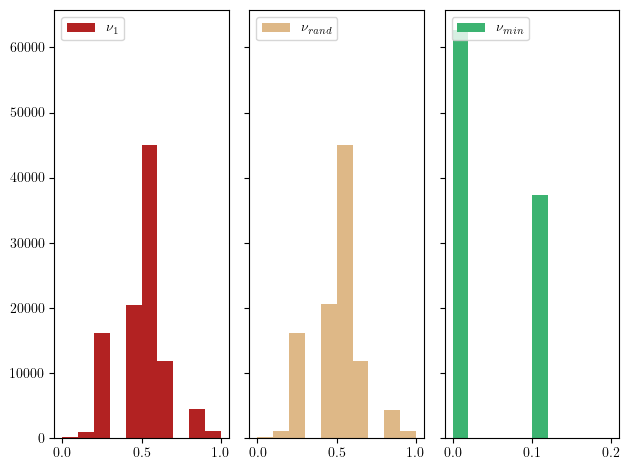

In [ ]:
plt.rcParams.update({"text.usetex": True}) #

fig, axs = plt.subplots(1,3,sharey=True, tight_layout=True)
n_bins = 10
# Crear el histograma para data1
axs[0].hist(data1[0],bins=n_bins, color='firebrick',label=r'$\nu_1$')
axs[1].hist(data1[1],bins=n_bins, color='burlywood',label=r'$\nu_{rand}$')
axs[2].hist(data1[2],bins=n_bins, color='mediumseagreen', label=r'$\nu_{min}$')

# Agregar leyenda

axs[0].legend(loc='upper left')
axs[1].legend(loc='upper left')
axs[2].legend(loc='upper left')

# Mostrar el gráfico
plt.savefig('Histogramas.svg', format='svg')
plt.show()

## $b)$

In [ ]:
mu=0.5
dif= lambda x: np.abs(x-mu)
difs =np.vectorize(dif)(data1) #Cálculo de la distancia entre nu y mu

eps=np.arange(0,0.5,0.001)
hoeff= 2.0*np.exp(-2.0*flips*(eps**2)) #Cálculo de la cota

prob= lambda x,indx: np.sum(difs[indx]>x)/N

#Probabilidades de cada moneda
p1=np.vectorize(prob)(eps,0)
prand=np.vectorize(prob)(eps,1)
pmin=np.vectorize(prob)(eps,2)

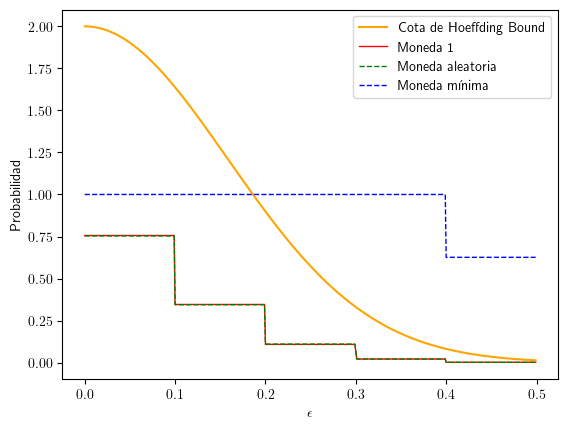

In [ ]:
fig, ax = plt.subplots()
 
#Gráfico de las probabilidades
plt.plot(eps, hoeff, color='orange', label='Cota de Hoeffding Bound')
plt.plot(eps, p1, color='r', linewidth=1, label='Moneda 1')
plt.plot(eps, prand, color='g', linewidth=1, linestyle='dashed', label='Moneda aleatoria')
plt.plot(eps, pmin, color='b', linewidth=1, linestyle='dashed', label='Moneda mínima')
plt.xlabel(r'$\epsilon$')
plt.ylabel('Probabilidad ')
plt.legend()
plt.savefig('cota.svg', format='svg')
plt.show()